In [1]:
from matplotlib import pyplot as plt
from whar_datasets.adapters.torch_adapter import TorchAdapter
from whar_datasets.support.getter import WHARDatasetID, get_dataset_cfg

In [4]:
cfg = get_dataset_cfg(WHARDatasetID.HHAR)

cfg.parallelize = False
cfg.in_memory = False
force_recompute = False
#force_recompute = [False, True, True]

In [3]:
# import pandas as pd
# from tqdm import tqdm
# from pathlib import Path
# from typing import Dict, Tuple
# import pandas as pd
# from dask.delayed import delayed
# from dask.base import compute
# from tqdm import tqdm
# from dask.diagnostics.progress import ProgressBar

# from whar_datasets.core.config import WHARConfig
# from whar_datasets.core.utils.loading import load_session
# from whar_datasets.core.utils.resampling import resample
# from whar_datasets.core.utils.selecting import select_channels
# from whar_datasets.core.utils.windowing import generate_windowing


# def process_session(
#     cfg: WHARConfig, sessions_dir: Path, session_id: int
# ) -> Tuple[pd.DataFrame | None, Dict[str, pd.DataFrame] | None]:
#     # laod and process session
#     session = load_session(sessions_dir, session_id)
#     session = select_channels(session, cfg.sensor_channels)
#     session = resample(session, cfg.sampling_freq)

#     # generate windowing
#     window_metadata, windows = generate_windowing(
#         session_id,
#         session,
#         cfg.window_time,
#         cfg.window_overlap,
#         cfg.sampling_freq,
#     )

#     if window_metadata is None or windows is None:
#         return None, None

#     return window_metadata, windows

# session_metadata = pd.read_parquet(
#     r"C:\Users\hohma\Teco\whar-datasets\notebooks\datasets\hhar\metadata\session_metadata.parquet"
# )

# # print(df.head())
# # print(df.dtypes)
# # print(df.shape)'

# loop = tqdm([int(x) for x in session_metadata["session_id"].unique()])
# loop.set_description("Processing sessions")

# pairs = [process_session(cfg, Path(r"C:\Users\hohma\Teco\whar-datasets\notebooks\datasets\hhar\sessions") , session_id) for session_id in loop]

# x,y = zip(*pairs)


In [5]:
dataset = TorchAdapter(cfg)
dataset.preprocess(force_recompute)
dataset.postprocess(split_group_index=0, force_recompute=force_recompute)

2026-01-16 14:09:38,199 - whar-datasets - INFO - Running DownloadingStep
2026-01-16 14:09:38,202 - whar-datasets - INFO - Checking hash for DownloadingStep
2026-01-16 14:09:38,208 - whar-datasets - INFO - Hash is up to date
2026-01-16 14:09:38,212 - whar-datasets - INFO - Running ParsingStep
2026-01-16 14:09:38,216 - whar-datasets - INFO - Checking hash for ParsingStep
2026-01-16 14:09:38,222 - whar-datasets - INFO - Hash is up to date
2026-01-16 14:09:38,225 - whar-datasets - INFO - Running WindowingStep
2026-01-16 14:09:38,228 - whar-datasets - INFO - Checking hash for WindowingStep


2026-01-16 14:09:38,237 - whar-datasets - INFO - Hash is up to date
2026-01-16 14:09:38,243 - whar-datasets - INFO - Loading windowing
2026-01-16 14:09:38,289 - whar-datasets - INFO - activity_ids from 0 to 5
2026-01-16 14:09:38,293 - whar-datasets - INFO - subject_ids from 0 to 7
2026-01-16 14:09:38,322 - whar-datasets - INFO - train: 6118 | val: 680 | test: 3981
2026-01-16 14:09:38,329 - whar-datasets - INFO - Running SamplingStep
2026-01-16 14:09:38,335 - whar-datasets - INFO - Checking hash for SamplingStep
2026-01-16 14:09:38,345 - whar-datasets - INFO - Hash is not up to date
Loading windows: 100%|██████████| 10779/10779 [01:33<00:00, 114.93it/s]
2026-01-16 14:11:12,146 - whar-datasets - INFO - Computing samples
2026-01-16 14:11:12,147 - whar-datasets - INFO - Getting normalization parameters
2026-01-16 14:11:12,845 - whar-datasets - INFO - Normalizing and transforming windows
Normalizing and transforming windows: 100%|██████████| 10779/10779 [01:43<00:00, 103.69it/s]
2026-01-16 

In [6]:
loaders = dataset.get_dataloaders(batch_size=32)

train_loader = loaders["train"]
test_loader = loaders["test"]
val_loader = loaders["val"]

In [7]:
weights = dataset.get_class_weights(test_loader)
print(weights)

{5: 0.7952276565143858, 1: 0.8978376767097903, 0: 0.9765953676492457, 2: 1.0213933202937064, 3: 1.1245643627476163, 4: 1.1843816160852556}


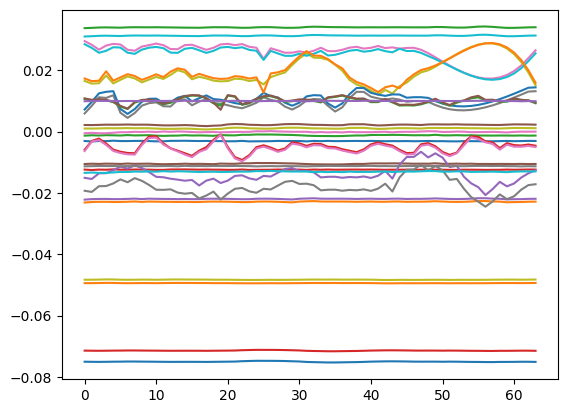

In [8]:
y_batch, x_batch = next(iter(train_loader))
x = x_batch[0].numpy()
plt.plot(x)
plt.show()